# Azure AI vision API for recognition handwrited text

Based on [this MS Learn manual](https://microsoftlearning.github.io/mslearn-ai-vision/Instructions/Exercises/05-ocr.html).

In [ ]:
%pip install azure-ai-vision-imageanalysis==1.0.0b3

In [1]:
from dotenv import load_dotenv
import os
import time
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

# Get Configuration Settings
load_dotenv()
ai_endpoint = os.getenv('AI_SERVICE_ENDPOINT')
ai_key = os.getenv('AI_SERVICE_KEY')
print(f'Endpoint: {ai_endpoint}')

Endpoint: https://ai-vision4342.cognitiveservices.azure.com/


In [2]:
# open image file
image_file = os.path.join (os.getcwd(), "data", "test-images", "Note.jpg")
with open(image_file, "rb") as f:
            image_data = f.read()

In [3]:
# Authenticate Azure AI Vision client
cv_client = ImageAnalysisClient(endpoint=ai_endpoint, credential=AzureKeyCredential(ai_key))

# Analyze image with Azure AI Vision. Note 'READ' visual feature is used
result = cv_client.analyze(
     image_data=image_data,
     visual_features=[VisualFeatures.READ]
 )
print(result)

{'modelVersion': '2023-10-01', 'metadata': {'width': 1024, 'height': 768}, 'readResult': {'blocks': [{'lines': [{'text': 'Shopping List', 'boundingPolygon': [{'x': 231, 'y': 141}, {'x': 693, 'y': 147}, {'x': 691, 'y': 245}, {'x': 230, 'y': 240}], 'words': [{'text': 'Shopping', 'boundingPolygon': [{'x': 240, 'y': 141}, {'x': 535, 'y': 149}, {'x': 531, 'y': 245}, {'x': 234, 'y': 234}], 'confidence': 0.963}, {'text': 'List', 'boundingPolygon': [{'x': 554, 'y': 149}, {'x': 689, 'y': 147}, {'x': 686, 'y': 244}, {'x': 550, 'y': 245}], 'confidence': 0.83}]}, {'text': 'Non- Fat milk', 'boundingPolygon': [{'x': 149, 'y': 302}, {'x': 633, 'y': 297}, {'x': 633, 'y': 374}, {'x': 150, 'y': 378}], 'words': [{'text': 'Non-', 'boundingPolygon': [{'x': 150, 'y': 303}, {'x': 309, 'y': 301}, {'x': 310, 'y': 378}, {'x': 153, 'y': 378}], 'confidence': 0.577}, {'text': 'Fat', 'boundingPolygon': [{'x': 324, 'y': 301}, {'x': 438, 'y': 300}, {'x': 437, 'y': 378}, {'x': 325, 'y': 378}], 'confidence': 0.842}, {'

In [4]:
for line in result.read.blocks[0].lines:
    # Return the text detected in the image
    print(f"  {line.text}")

  Shopping List
  Non- Fat milk
  Bread
  Eggs



Text:
  Shopping List
   Bounding Polygon: ((231, 141), (693, 147), (691, 245), (230, 240))
    Word: 'Shopping', Bounding Polygon: ((240, 141), (535, 149), (531, 245), (234, 234)), Confidence: 0.9630
    Word: 'List', Bounding Polygon: ((554, 149), (689, 147), (686, 244), (550, 245)), Confidence: 0.8300
  Non- Fat milk
   Bounding Polygon: ((149, 302), (633, 297), (633, 374), (150, 378))
    Word: 'Non-', Bounding Polygon: ((150, 303), (309, 301), (310, 378), (153, 378)), Confidence: 0.5770
    Word: 'Fat', Bounding Polygon: ((324, 301), (438, 300), (437, 378), (325, 378)), Confidence: 0.8420
    Word: 'milk', Bounding Polygon: ((476, 299), (620, 298), (617, 374), (475, 377)), Confidence: 0.9940
  Bread
   Bounding Polygon: ((138, 400), (382, 399), (383, 472), (138, 474))
    Word: 'Bread', Bounding Polygon: ((152, 400), (366, 400), (368, 471), (151, 475)), Confidence: 0.9950
  Eggs
   Bounding Polygon: ((146, 517), (351, 526), (348, 605), (146, 609))
    Word: 'Eggs', Bounding Polyg

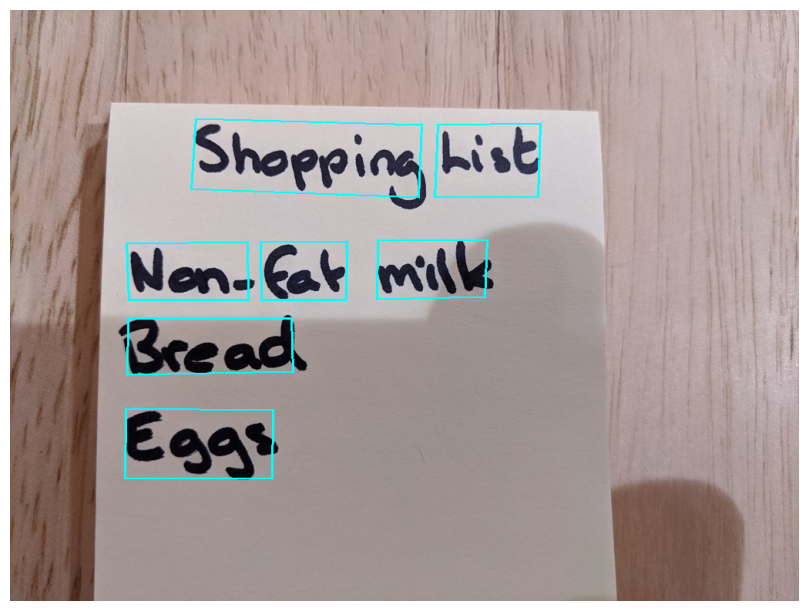

In [12]:
# Display the image and overlay it with the extracted text
print("\nText:")

# Prepare image for drawing
image = Image.open(image_file)
fig = plt.figure(figsize=(image.width/100, image.height/100))
plt.axis('off')
draw = ImageDraw.Draw(image)
color = 'cyan'

for line in result.read.blocks[0].lines:
    # Return the text detected in the image
    print(f"  {line.text}")

    drawLinePolygon = True
    r = line.bounding_polygon
    bounding_polygon = ((r[0].x, r[0].y),(r[1].x, r[1].y),(r[2].x, r[2].y),(r[3].x, r[3].y))

    # Return the position bounding box around each line
    print("   Bounding Polygon: {}".format(bounding_polygon))

    # Return each word detected in the image and the position bounding box around each word with the confidence level of each word
    for word in line.words:
        r = word.bounding_polygon
        bounding_polygon = ((r[0].x, r[0].y),(r[1].x, r[1].y),(r[2].x, r[2].y),(r[3].x, r[3].y))
        print(f"    Word: '{word.text}', Bounding Polygon: {bounding_polygon}, Confidence: {word.confidence:.4f}")

        # Draw word bounding polygon
        drawLinePolygon = False
        draw.polygon(bounding_polygon, outline=color, width=3)

    # Draw line bounding polygon
    if drawLinePolygon:
        draw.polygon(bounding_polygon, outline=color, width=3)

plt.imshow(image)

In [13]:
# Save image
outputfile = os.path.join (os.getcwd(), "data", "output", "Note-OCR-boxes.jpg")
fig.savefig(outputfile)
print('\n  Results saved in', outputfile)


  Results saved in c:\DY\Programming\Azure-AI\Azure-AI\data\output\Note-OCR-boxes.jpg
